Step 1: Load and Explore the Data

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
# Display the first few rows of each dataset
print("Customers Dataset:")
display(customers.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
print("Products Dataset:")
display(products.head())

Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
print("Transactions Dataset:")
display(transactions.head())

Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
# Check for missing values
print("\nMissing Values:")
print("Customers Dataset:\n", customers.isnull().sum())
print("Products Dataset:\n", products.isnull().sum())
print("Transactions Dataset:\n", transactions.isnull().sum())


Missing Values:
Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions Dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Basic summary statistics
print("\nSummary Statistics:")
print("Transactions Dataset:\n", transactions.describe())


Summary Statistics:
Transactions Dataset:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Code for Detailed EDA

We’ll explore customer regions, product categories, transaction trends, and more.

1. Data Overview and Merging Datasets

We’ll merge the datasets to analyze transactions in more depth.

In [11]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [12]:
# Display the merged dataset
print("Merged Dataset:")
display(merged_data.head())

Merged Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [13]:
# Check for missing values in the merged dataset
print("\nMissing Values in Merged Dataset:")
print(merged_data.isnull().sum())
# None of them are missing now we can move forward


Missing Values in Merged Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [15]:
# Basic info about merged dataset Useful for further analysis if needed
print("\nMerged Dataset Info:")
merged_data.info()


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


2. Customer Region Analysis

Visualize how customers are distributed across regions.

In [17]:
# Count customers by region
region_counts = customers['Region'].value_counts()
print(region_counts)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


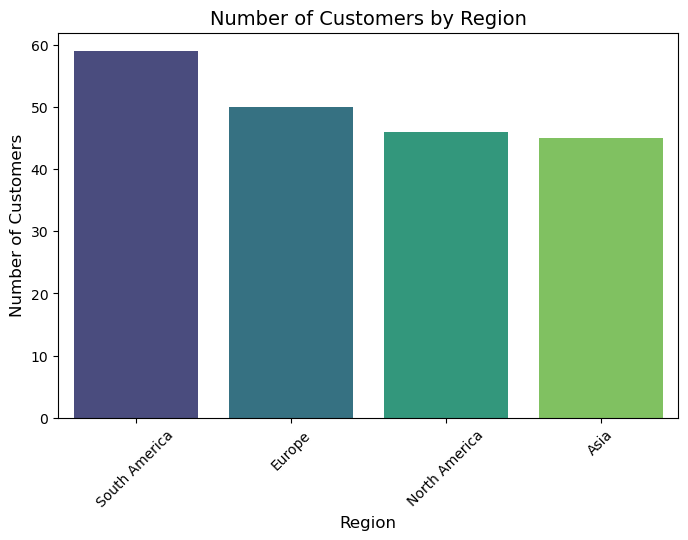

In [18]:
# Plot region distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Number of Customers by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

3. Top-Selling Product Categories

Find and visualize the top-selling categories based on transaction quantities.

In [21]:
# Calculate total quantity sold per category
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(category_sales)

Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


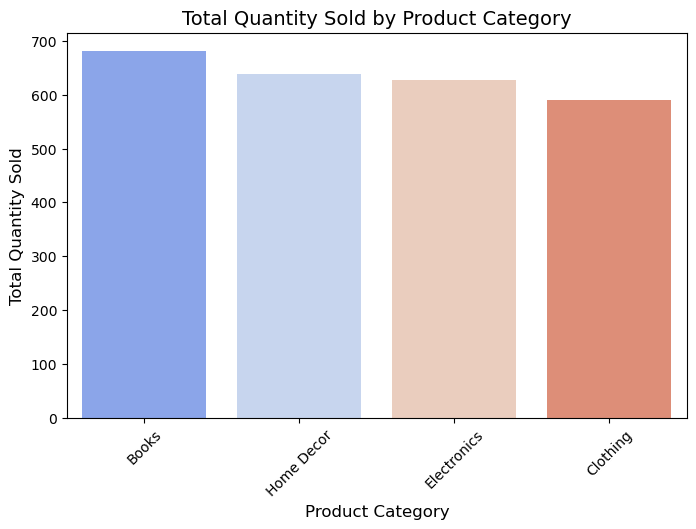

In [22]:
# Plot top-selling categories
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='coolwarm')
plt.title('Total Quantity Sold by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.show()

*4. Monthly Transaction Trends*

Analyze transaction trends over time.

In [24]:
# Convert TransactionDate to datetime format and extract month
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')

In [30]:
# Group by month to get total transaction values
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
print(monthly_sales)

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


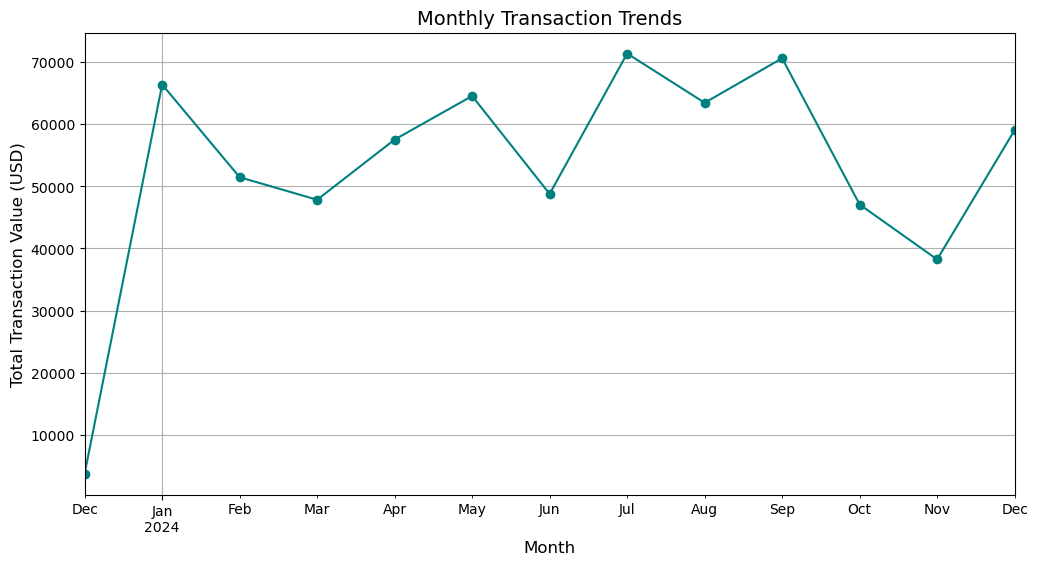

In [31]:
# Plot monthly transaction trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Transaction Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transaction Value (USD)', fontsize=12)
plt.grid()
plt.show()

5. Customer Spending Distribution

Analyze the distribution of total spending by customers.

In [32]:
# Calculate total spending per customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum()
print(customer_spending)

CustomerID
C0001    3354.52
C0002    1862.74
C0003    2725.38
C0004    5354.88
C0005    2034.24
          ...   
C0196    4982.88
C0197    1928.65
C0198     931.83
C0199    1979.28
C0200    4758.60
Name: TotalValue, Length: 199, dtype: float64


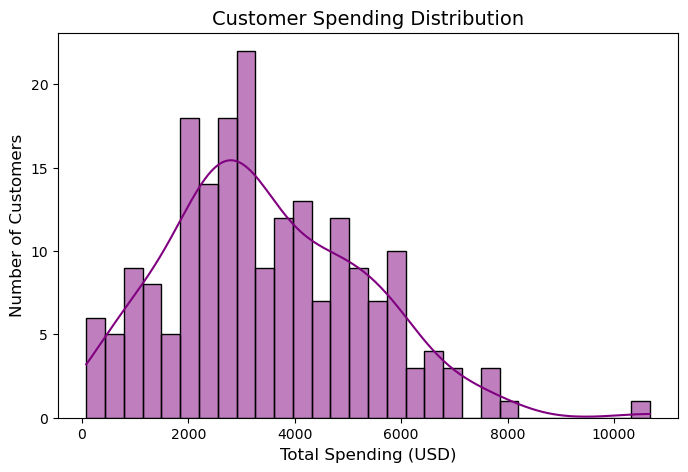

In [35]:
# Plot spending distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_spending, bins=30, kde=True, color='purple')
plt.title('Customer Spending Distribution', fontsize=14)
plt.xlabel('Total Spending (USD)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

#completed Task 1: Exploratory Data Analysis (EDA) and Business Insights